In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 

In [3]:
loan_data=pd.read_csv('Loan_Data.csv')

In [4]:
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
loan_status=pd.get_dummies(loan_data['Loan_Status'],drop_first=True)
Sex=pd.get_dummies(loan_data['Gender'],drop_first=True)
Married=pd.get_dummies(loan_data['Married'],drop_first=True)
Dependents=pd.get_dummies(loan_data['Dependents'],drop_first=True)
Education=pd.get_dummies(loan_data['Education'],drop_first=True)
Self_Employed=pd.get_dummies(loan_data['Self_Employed'],drop_first=True)
Property_Area=pd.get_dummies(loan_data['Property_Area'])

In [7]:
loan_data=pd.concat([loan_data,loan_status,Sex,Married,Dependents,Education,Self_Employed,Property_Area],axis=1)
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,...,Male,Yes,1,2,3+,Not Graduate,Yes,Rural,Semiurban,Urban
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,...,1,0,0,0,0,0,0,0,0,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,...,1,1,1,0,0,0,0,1,0,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,...,1,1,0,0,0,0,1,0,0,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,...,1,1,0,0,0,1,0,0,0,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,...,1,0,0,0,0,0,0,0,0,1


In [8]:
loan_data=loan_data.drop(['Loan_Status','Loan_ID','Gender','Married','Dependents','Education','Self_Employed','Property_Area'],axis=1)

In [9]:

loan_data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Y,Male,Yes,1,2,3+,Not Graduate,Yes,Rural,Semiurban,Urban
0,5849,0.0,NaN,360.0,1.0,1,1,0,0,0,0,0,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,0,1,1,1,0,0,0,0,1,0,0
2,3000,0.0,66.0,360.0,1.0,1,1,1,0,0,0,0,1,0,0,1
3,2583,2358.0,120.0,360.0,1.0,1,1,1,0,0,0,1,0,0,0,1
4,6000,0.0,141.0,360.0,1.0,1,1,0,0,0,0,0,0,0,0,1


<AxesSubplot: >

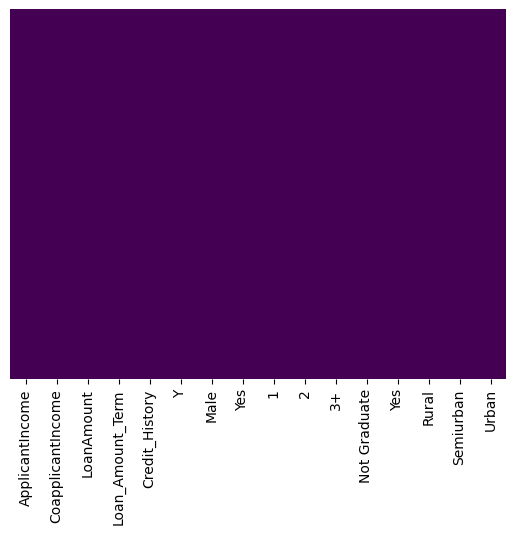

In [10]:
loan_data=loan_data.dropna(how='any')
sns.heatmap(loan_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
loan_data.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Y', 'Male', 'Yes', '1', '2',
       '3+', 'Not Graduate', 'Yes', 'Rural', 'Semiurban', 'Urban'],
      dtype='object')

In [13]:
X=loan_data[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History','Male', 'Yes', '1', '2',
       '3+', 'Not Graduate', 'Yes', 'Rural', 'Semiurban', 'Urban']]
y=loan_data['Y']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=101,test_size=0.5)

In [15]:
from sklearn.linear_model import LogisticRegression

In [ ]:
S

In [16]:
logModel=LogisticRegression()
logModel.fit(X_train,y_train)

LogisticRegression()

In [17]:
predict=logModel.predict(X_test)

In [18]:
from sklearn.metrics import classification_report,confusion_matrix

In [19]:
print(classification_report(y_test,predict))
print(confusion_matrix(y_test,predict))

              precision    recall  f1-score   support

           0       0.69      0.49      0.58        77
           1       0.81      0.91      0.86       188

    accuracy                           0.79       265
   macro avg       0.75      0.70      0.72       265
weighted avg       0.78      0.79      0.78       265

[[ 38  39]
 [ 17 171]]
